# 1) Introduction to data

The Iris dataset is a small, well-known dataset consisting of 150 samples of iris flowers, each with four features (sepal length, sepal width, petal length, and petal width). The dataset is commonly used for practicing classification tasks in machine learning and data analysis, where the goal is to classify each iris flower into one of three species: Setosa, Versicolor, or Virginica.

# 2) Loading modules

In [3]:
# basic modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# modelling libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [5]:
# algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [6]:
# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# 3) Loading dataset

In [7]:
df = pd.read_csv("iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# 4) EDA

In [8]:
# display statistics about data
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
# basic info of datatype in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
# display the number of samples on each class
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [11]:
# check for null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
# delete column 'id'
df = df.drop(columns='Id')

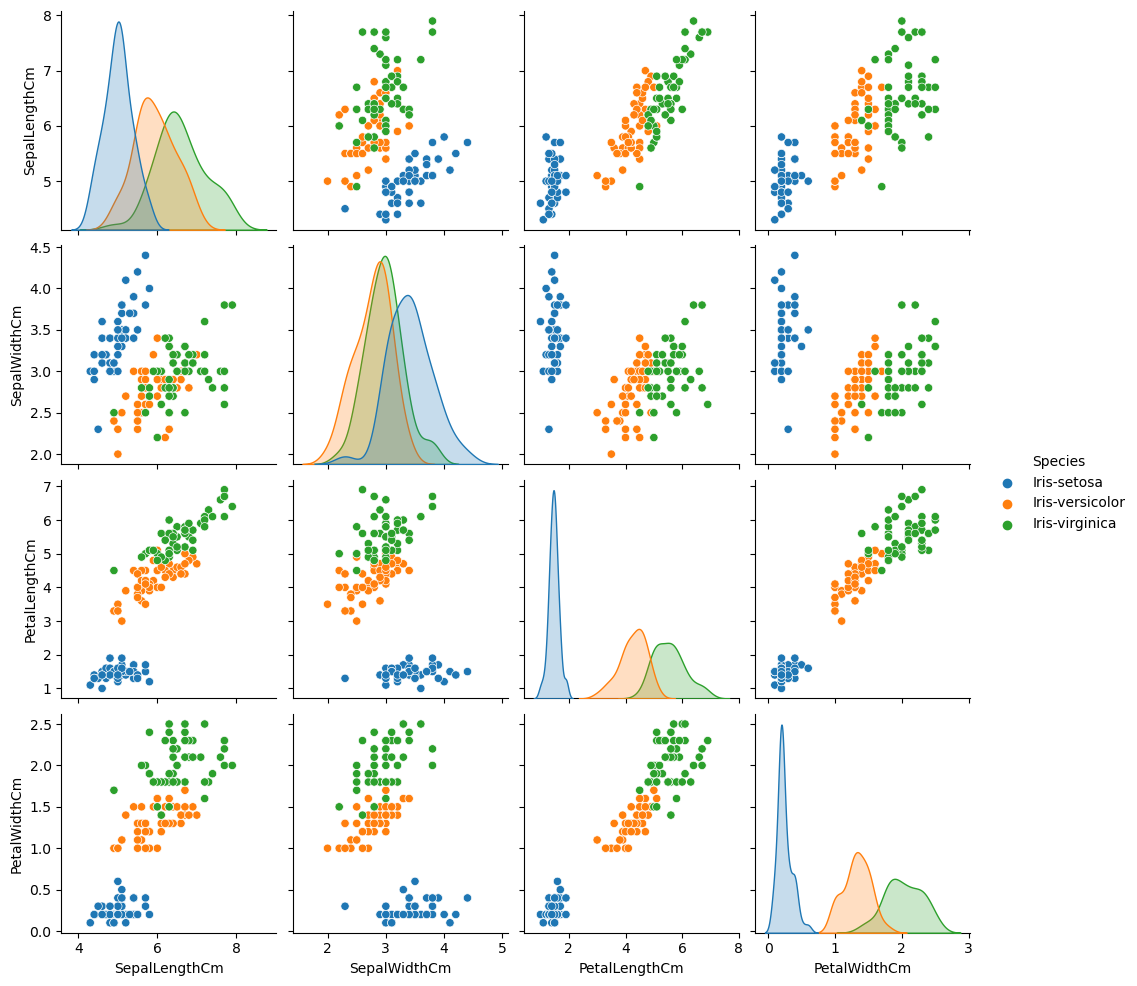

In [13]:
# visualisation
sns.pairplot(data=df,hue='Species')

### Correlatin Matrix
Correlation matrix tells relationships between variables , which helps us in identifying patterns, and dependencies in data through correlation coefficients.

In [14]:
# compute corr matrix
corr = df.corr()
corr

C:\Users\hp\AppData\Local\Temp\ipykernel_16748\3612543064.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

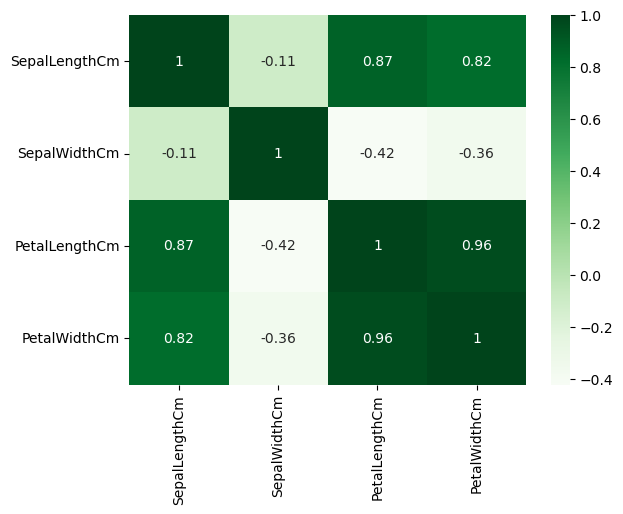

In [15]:
# display corr matrix 
sns.heatmap(corr,annot=True, cmap='Greens')

# 5) Model training

In [16]:
# split dataset into train-test sets
X= df.drop(columns=['Species'])
Y=df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=2)

In [17]:
# Logistic Regression Model
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)
lr_accuracy= lr.score(x_test, y_test) * 100
print("Accuracy (Logistic Regression): ",lr_accuracy )

Accuracy (Logistic Regression):  97.77777777777777


In [18]:
# K-nearest neighbor model (KNN)
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_accuracy = knn.score(x_test, y_test)*100
print("Accuracy (KNN): ",knn_accuracy)

Accuracy (KNN):  100.0


In [19]:
# Decision Tree Model
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtc_accuracy = dtc.score(x_test, y_test) * 100
print("Accuracy (Decision Tree): ",dtc_accuracy)

Accuracy (Decision Tree):  95.55555555555556


In [20]:
# Random forest Model
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc_accuracy = dtc.score(x_test, y_test) * 100
print("Accuracy (Random Forest ): ",rfc_accuracy)

Accuracy (Random Forest ):  95.55555555555556


# 6) Project Report

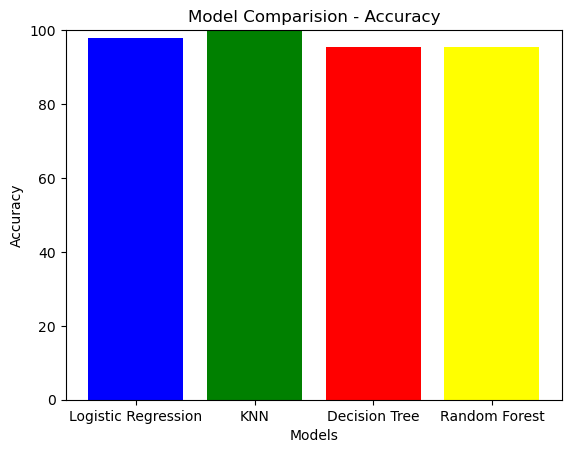

In [23]:
# Model Comparision-Visualisation
models = ['Logistic Regression','KNN','Decision Tree','Random Forest']
accuracies =[lr_accuracy,knn_accuracy,dtc_accuracy,rfc_accuracy]
plt.bar(models, accuracies, color=['blue','green','red','yellow'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Comparision - Accuracy")
plt.ylim([0 , 100])
plt.show()

## Confusion Matrix

In [25]:
y_pred1 = lr.predict(x_test)
y_pred2 = knn.predict(x_test)
y_pred3 = dtc.predict(x_test)
y_pred4 = rfc.predict(x_test)

conf_matrix1 = confusion_matrix(y_test, y_pred1)
conf_matrix2 = confusion_matrix(y_test, y_pred2)
conf_matrix3 = confusion_matrix(y_test, y_pred3)
conf_matrix4 = confusion_matrix(y_test, y_pred4)

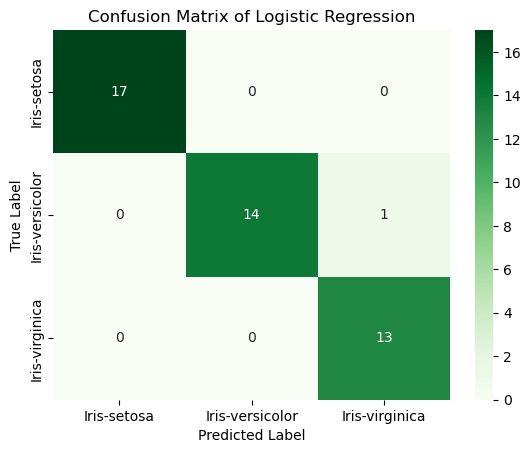

In [26]:
plt.figure()
sns.heatmap(conf_matrix1, annot=True, cmap='Greens', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

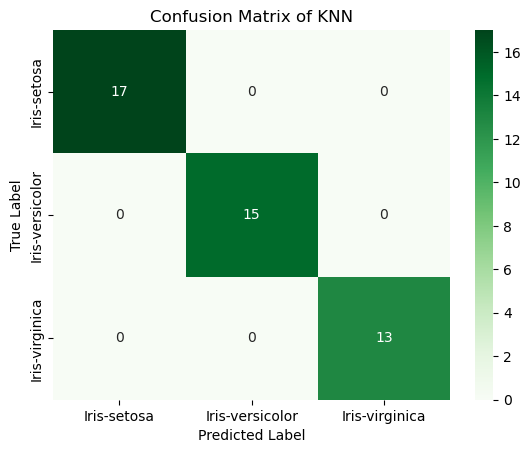

In [27]:
plt.figure()
sns.heatmap(conf_matrix2, annot=True, cmap='Greens', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of KNN')
plt.show()

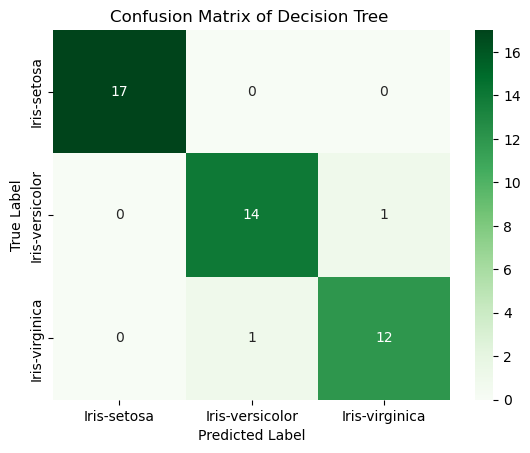

In [30]:
plt.figure()
sns.heatmap(conf_matrix3, annot=True, cmap='Greens', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Decision Tree ')
plt.show()

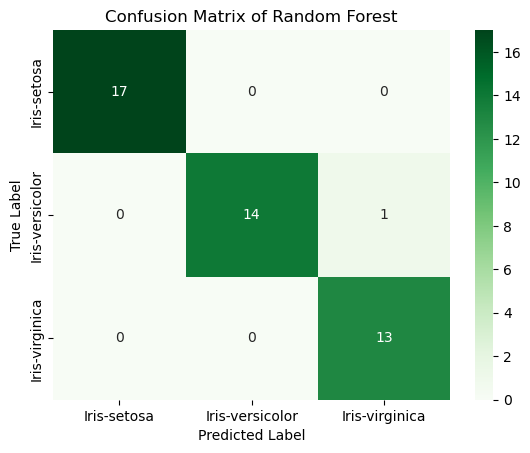

In [29]:
plt.figure()
sns.heatmap(conf_matrix4, annot=True, cmap='Greens', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Random Forest')
plt.show()